In [1]:
import os
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plt_show_gray(image):
    plt.imshow(image, cmap='gray')
    plt.show()
def plt_show_color(image):
    b, g, r = cv2.split(image)
    img = cv2.merge([r,g,b])
    plt.imshow(img)
    plt.show()

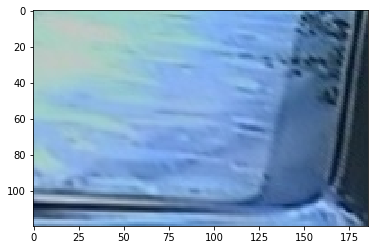

In [3]:
# 加载图片
src = cv2.imread('end.jpg')
plt_show_color(src)

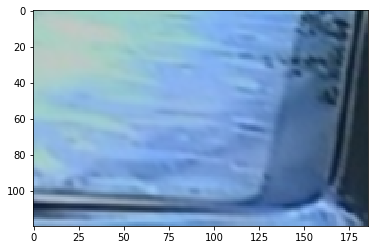

In [4]:
# 高斯去噪
image = cv2.GaussianBlur(src, (3, 3), 0)
plt_show_color(image)

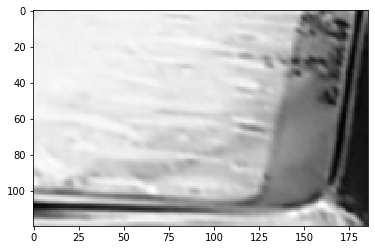

In [5]:
# 灰度处理
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt_show_gray(gray)

In [6]:
# maxi = float(gray.max())
# mini = float(gray.min())
# gray_inage = ((255/(maxi-mini)*gray)-(255*mini)/(maxi-mini)).astype(np.uint8)
# gray = cv2.equalizeHist(gray)

In [7]:
def unevenLightCompensate(img, blockSize):# 光照均衡化，过度地带颜色偏深
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    average = np.mean(gray)

    rows_new = int(np.ceil(gray.shape[0] / blockSize))
    cols_new = int(np.ceil(gray.shape[1] / blockSize))

    blockImage = np.zeros((rows_new, cols_new), dtype=np.float32)
    for r in range(rows_new):
        for c in range(cols_new):
            rowmin = r * blockSize
            rowmax = (r + 1) * blockSize
            if (rowmax > gray.shape[0]):
                rowmax = gray.shape[0]
            colmin = c * blockSize
            colmax = (c + 1) * blockSize
            if (colmax > gray.shape[1]):
                colmax = gray.shape[1]

            imageROI = gray[rowmin:rowmax, colmin:colmax]
            temaver = np.mean(imageROI)
            blockImage[r, c] = temaver

    blockImage = blockImage - average
    blockImage2 = cv2.resize(blockImage, (gray.shape[1], gray.shape[0]), interpolation=cv2.INTER_CUBIC)
    gray2 = gray.astype(np.float32)
    dst = gray2 - blockImage2
    dst = dst.astype(np.uint8)
    dst = cv2.GaussianBlur(dst, (3, 3), 0)

    return dst

In [8]:
blockSize = 16
gray = unevenLightCompensate(src, blockSize)


In [9]:
# # 自适应阈值处理
# for i in range(255,5,-5):
# #     ret, image = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU |cv2.THRESH_BINARY)
#     ret, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# #     plt_show_gray(image)
# #     plt_show_gray(binary)
    
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))
#     binary = cv2.dilate(binary, kernel)
# #     plt_show_gray(binary)
    
#     # 轮廓检测
#     contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#     imagel = src.copy()
#     cv2.drawContours(imagel, contours, -1, (0, 0, 255), 1)
# #     plt_show_color(imagel)
    
    
#     # 筛选出各个字符的位置的轮廓
#     words = []
#     for item in contours:
#         word = []
#         rect = cv2.boundingRect(item)
#         x = rect[0]
#         y = rect[1]
#         weight = rect[2]
#         height = rect[3]
#         word.append(x)
#         word.append(y)
#         word.append(weight)
#         word.append(height)
#         words.append(word)

#     words = sorted(words, key = lambda s:s[0], reverse = False)
    
# #     print(words)
#     word2 = []
#     for word in words:# 3-长  2-宽 1-起点的很横坐标  0-纵
#         if(word[3] > (word[2] * 1.5)) and (word[3] < (word[2] * 9)) and word[2]*word[3]>200:
#             word2.append(word)
#             image = src[word[1]:word[1]+word[3], word[0]:word[0]+word[2]]
# #             plt_show_color(image)
# #     if word2[0][3]<word2[0][2]*1.5:
# #         del wor2[0]
#     if len(word2)==7:
#         plt_show_gray(binary)
#         for word in word2:
#             image = src[word[1]:word[1]+word[3], word[0]:word[0]+word[2]]
#             plt_show_color(image)
#             print(word)
#             print(i)
#         break

(120, 186)


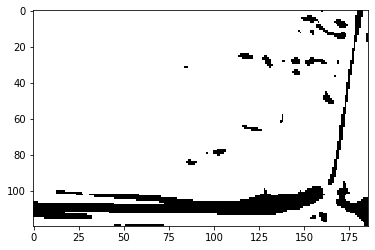

120 186


In [10]:
ret, image = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
print(image.shape) 
plt_show_gray(image)
rows = image.shape[0]
cols = image.shape[1]
print(rows,cols)

In [11]:
# 二值统计,统计没每一行的黑值（0）的个数
hd = []
print(rows)
for row in range(rows):
    res = 0
    for col in range(cols):
        if image[row][col] !=0:
            res = res+1
    hd.append(res)
len(hd)

120


120

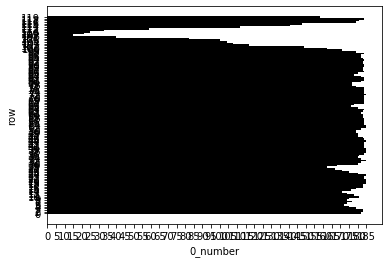

In [12]:
# 画出柱状图
y = [y for y in range(rows)]
x = hd
plt.barh(y,x,color='black',height=1)
# 设置x，y轴标签
plt.xlabel('0_number')
plt.ylabel('row')
# 设置刻度
plt.xticks([x for x in range(0,cols,5)])
plt.yticks([y for y in range(0,rows,1)])

plt.show()

In [13]:
# 定义一个算法,找到波谷,定位车牌字符的行数区域
# 我的思路;对于一个车牌,中间位置肯定是有均匀的黑色点的,所以我将图片垂直分为两部分,找波谷
mean = sum(hd[0:int(rows/2)])/(int(rows/2)+1)
region = []
for i in range(int(rows/2),0,-1): # 0,1行肯定是边框,直接不考虑,直接从第二行开始
    if hd[i]<mean/2:
        region.append(i)
        break
    else:
        region.append(i)
print(mean)
for i in range(int(rows/2),rows): # 0,1行肯定是边框,直接不考虑,直接从第二行开始
    if hd[i]<mean/2:
        region.append(i)
        break
    else:
        region.append(i)
print(min(region))
print(max(region))

177.36065573770492
1
106


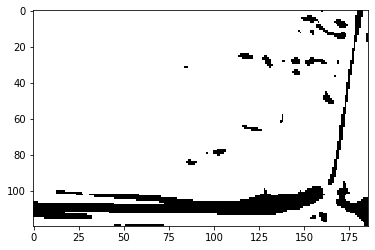

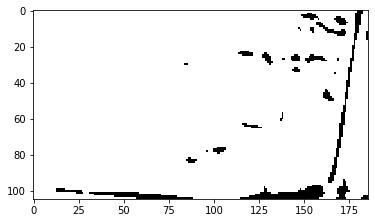

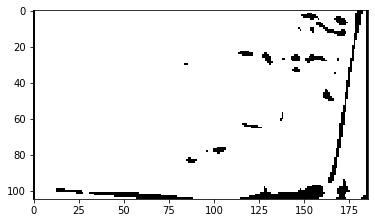

In [14]:
# image1 = image.copy() # 使用行区间
image1 = image[min(region):max(region),:] # 使用行区间
plt_show_gray(image)
plt_show_gray(image1)
image1[:, :1] = 0
image1[:, -1:] = 0
plt_show_gray(image1)

In [15]:
image11 = image1.copy()
image11.shape # 47行，170列
rows = image11.shape[0]
cols = image11.shape[1]
print(rows,cols)

105 186


In [16]:
# 二值统计,统计没每一列的黑值（0）的个数
hd1 = []
for col in range(cols):
    res = 0
    for row in range(rows):
        if image11[row][col] == 255:
            res = res+1
    hd1.append(res)
len(hd1)
max(hd1)

105

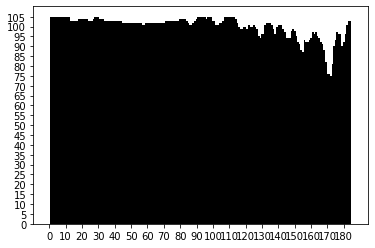

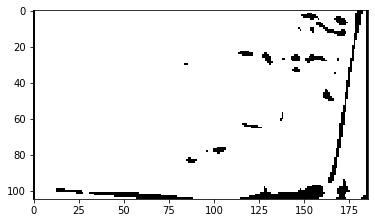

In [17]:
# 画出柱状图
y = hd1 # 点个数
x = [x for x in range(cols)] # 列数
plt.bar(x,y,color='black',width=1)
# 设置x，y轴标签
# 设置刻度
plt.xticks([x for x in range(0,cols,10)])
plt.yticks([y for y in range(0,max(hd1)+5,5)])

plt.show()
plt_show_gray(image1)

In [18]:
# 找所有不为0的区间(列数)
region1 = []
reg = []
for i in range(cols-1):
    if hd1[i]==0 and hd1[i+1] != 0:
        reg.append(i)
    if hd1[i]!=0 and hd1[i+1] == 0:
        reg.append(i+2)
    if len(reg) == 2:

        if (reg[1]-reg[0])>7: # 限定区间长度要大于5(可以更大),过滤掉不需要的点
            region1.append(reg) 
            reg = []
        else:
            reg = []
            
region1

[[0, 186]]

In [19]:
endlist = []
endlen = int(src.shape[1]/7*1.5)
if len(region1) != 7:
    j = 0
    for i in range(len(region1)):
        if region1[i][1]-region1[i][0]>endlen:
            mean = abs(7-len(region1))+1
            lis_1 = [region1[i][0], int(region1[i][0]+(region1[i][1]-region1[i][0])/mean)]
            lis_2 = [int(region1[i][0]+2+(region1[i][1]-region1[i][0])/mean), region1[i][1]]
            endlist.append(lis_1)
            endlist.append(lis_2)
        else :
            endlist.append(region1[i])
else:
    endlist = region1.copy()
if len(endlist)!=0:
    if endlist[-1][1]-endlist[-1][0]>int(region1[-1][-1]/7):
        endlist[-1] = [endlist[-1][0], endlist[-1][0] + int((endlist[-1][1]-endlist[-1][0])*2/3)]
endlist       

[[0, 26], [28, 133]]

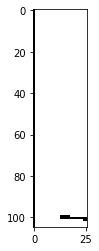

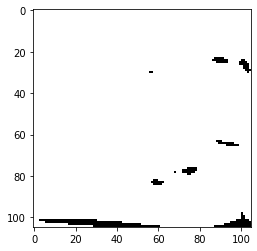

In [20]:
for i in range(len(endlist )):
    image2 = image1[:,endlist[i][0]:endlist[i][1]]
    cv2.imwrite(str(i) + ".jpg", image2)
    plt_show_gray(image2)